In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Flatten, Input, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("/content/Zomato Chennai Listing 2020.csv")

# Display first few rows and check for missing values
print(df.head())
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


                                          Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']  

In [4]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Verify that missing values are handled
print(df_cleaned.isnull().sum())


Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64


<ipython-input-5-3b9ddd3b2107>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


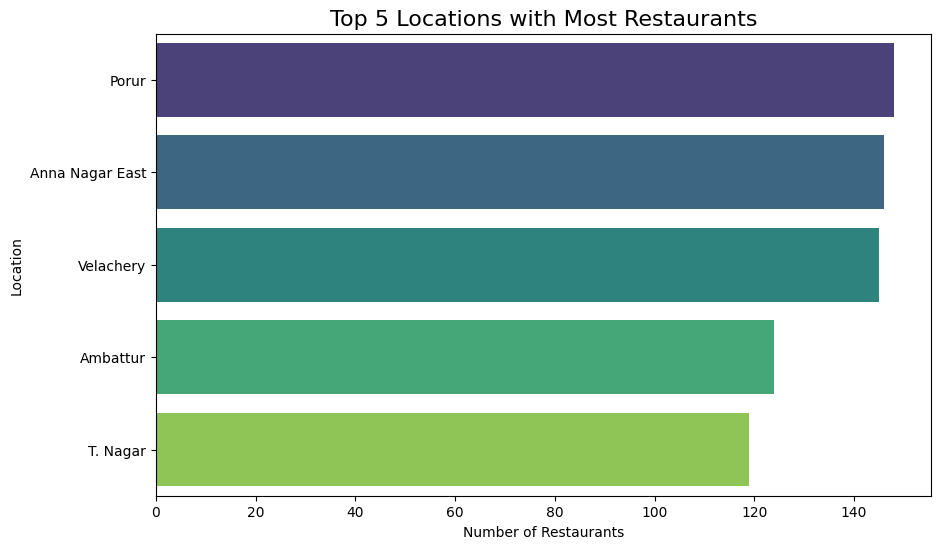

In [5]:
# Count the number of restaurants in each location
top_locations = df_cleaned['Location'].value_counts().head(5)

# Plot the top 5 locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top 5 Locations with Most Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()


<ipython-input-6-e6ab458b3df3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cuisine'] = df_cleaned['Cuisine'].str.strip("[]").str.replace("'", "").str.split(", ")
<ipython-input-6-e6ab458b3df3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_list.values, y=cuisine_list.index, palette='magma')


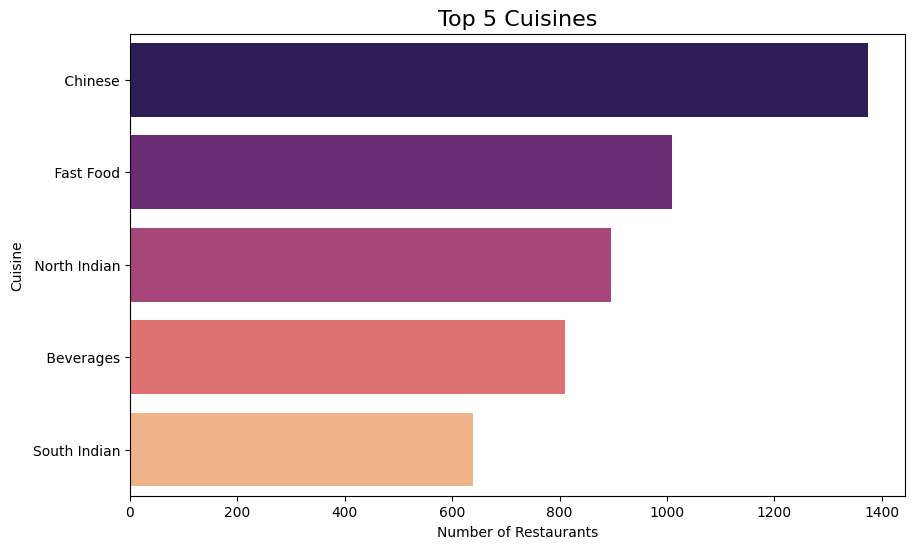

In [6]:
# Cleaning and splitting the cuisine column
df_cleaned['Cuisine'] = df_cleaned['Cuisine'].str.strip("[]").str.replace("'", "").str.split(", ")

# Flatten the list of cuisines and count the occurrences
cuisine_list = df_cleaned['Cuisine'].explode().value_counts().head(5)

# Plot the top 5 cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_list.values, y=cuisine_list.index, palette='magma')
plt.title('Top 5 Cuisines', fontsize=16)
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


In [7]:
# Find the restaurant with the maximum dining rating
max_dining_rating = df_cleaned['Dining Rating'].max()
restaurant_max_rating = df_cleaned[df_cleaned['Dining Rating'] == max_dining_rating]

print("Restaurant with Maximum Dining Rating:")
print(restaurant_max_rating[['Name of Restaurant', 'Location', 'Dining Rating']])


Restaurant with Maximum Dining Rating:
        Name of Restaurant                      Location  Dining Rating
57          Brownie Heaven                    Royapettah            4.9
105                Bhangra  Mayajaal Multiplex, Kanathur            4.9
155      The Sandwich Shop                 West Mambalam            4.9
184   Gossip Fusion Bistro                      Kanathur            4.9
192           Kabab Corner                        Egmore            4.9
219  Prems Graama Bhojanam                         Adyar            4.9
320           Bombay Kulfi                         Adyar            4.9


In [8]:
# Find the restaurant with the minimum dining rating
min_dining_rating = df_cleaned['Dining Rating'].min()
restaurant_min_rating = df_cleaned[df_cleaned['Dining Rating'] == min_dining_rating]

print("Restaurant with Minimum Dining Rating:")
print(restaurant_min_rating[['Name of Restaurant', 'Location', 'Dining Rating']])


Restaurant with Minimum Dining Rating:
      Name of Restaurant     Location  Dining Rating
11155   Le Wrap Factorie  Injambakkam            0.3


In [9]:
# Safely convert 'Dining Rating' column to numeric
df_cleaned.loc[:, 'Dining Rating'] = pd.to_numeric(df_cleaned['Dining Rating'], errors='coerce')

<ipython-input-10-942f4586c4e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['user_id'] = user_encoder.fit_transform(df_cleaned['Name of Restaurant'])
<ipython-input-10-942f4586c4e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['item_id'] = item_encoder.fit_transform(df_cleaned['Location'])


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.1556 - val_loss: 0.3024
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2445 - val_loss: 0.2722
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1405 - val_loss: 0.2645
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0828 - val_loss: 0.2737
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0739 - val_loss: 0.2766
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0675 - val_loss: 0.2626
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0695 - val_loss: 0.2688
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0615 - val_loss: 0.2654
Epoch 9/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0570 - val_loss: 0.2691
Epoch 10/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0510 - val_loss: 0.2618
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3166 
Test Loss: 0.28942105174064636


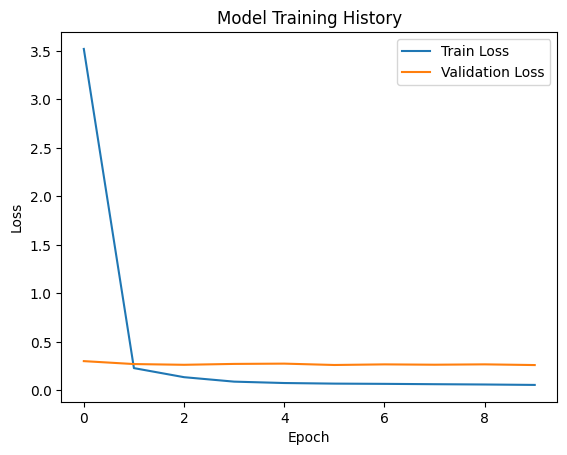

In [10]:
# prompt: give me neural collaborative filtering for the dataset which i have used here.

# Assuming 'Name of Restaurant' and 'Location' are the user and item features respectively.
# We need to create a unique ID for each user and item.
# Import necessary libraries
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

df_cleaned['user_id'] = user_encoder.fit_transform(df_cleaned['Name of Restaurant'])
df_cleaned['item_id'] = item_encoder.fit_transform(df_cleaned['Location'])

# Prepare the data for neural collaborative filtering
num_users = df_cleaned['user_id'].nunique()
num_items = df_cleaned['item_id'].nunique()

# Create a training and testing split
train_df, test_df = train_test_split(df_cleaned[['user_id', 'item_id', 'Dining Rating']], test_size=0.2, random_state=42)

# Define the Neural Collaborative Filtering model
def create_ncf_model(num_users, num_items, embedding_size=32):
  user_input = Input(shape=(1,))
  item_input = Input(shape=(1,))

  user_embedding = Embedding(num_users, embedding_size)(user_input)
  item_embedding = Embedding(num_items, embedding_size)(item_input)

  user_flatten = Flatten()(user_embedding)
  item_flatten = Flatten()(item_embedding)

  merged = Concatenate()([user_flatten, item_flatten])
  dense1 = Dense(128, activation='relu')(merged)
  dense2 = Dense(64, activation='relu')(dense1)
  output = Dense(1)(dense2)

  model = Model(inputs=[user_input, item_input], outputs=output)
  return model

# Create and compile the model
ncf_model = create_ncf_model(num_users, num_items)
ncf_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = ncf_model.fit([train_df['user_id'], train_df['item_id']], train_df['Dining Rating'],
                    epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss = ncf_model.evaluate([test_df['user_id'], test_df['item_id']], test_df['Dining Rating'])
print("Test Loss:", test_loss)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# You can then use the trained model to predict ratings for new user-item pairs.
# For example:
# user_id = 10
# item_id = 5
# predicted_rating = ncf_model.predict([[user_id], [item_id]])
# print(predicted_rating)


In [11]:
def recommend_restaurants(user_id, ncf_model, df_cleaned, num_items, top_n=5):
  """
  Recommends restaurants to a user based on the NCF model.

  Args:
    user_id: The ID of the user to recommend restaurants to.
    ncf_model: The trained NCF model.
    df_cleaned: The cleaned DataFrame with user and item IDs.
    num_items: The total number of unique items (locations).
    top_n: The number of top recommendations to return.

  Returns:
    A list of recommended restaurant names.
  """

  # Create a list of all item IDs
  all_item_ids = list(range(num_items))

  # Predict ratings for all items for the given user
  # The original code was passing a nested list which was causing the error.
  # This has been corrected to pass the user_id and item_id as separate lists.
  predicted_ratings = ncf_model.predict([np.array([user_id] * num_items), np.array(all_item_ids)])

  # Create a DataFrame with item IDs and predicted ratings
  predictions_df = pd.DataFrame({'item_id': all_item_ids, 'predicted_rating': predicted_ratings.flatten()})

  # Merge with the original DataFrame to get restaurant names
  recommendations_df = predictions_df.merge(df_cleaned[['item_id', 'Name of Restaurant']], on='item_id', how='left')

  # Sort by predicted rating in descending order
  recommendations_df = recommendations_df.sort_values('predicted_rating', ascending=False)

  # Get the top N recommendations
  top_recommendations = recommendations_df['Name of Restaurant'].unique()[:top_n]

  return top_recommendations

# Example: Recommend restaurants for user with ID 10
user_id_to_recommend = 2
recommended_restaurants = recommend_restaurants(user_id_to_recommend, ncf_model, df_cleaned, num_items)

print(f"Recommended restaurants for user {user_id_to_recommend}:")
for restaurant in recommended_restaurants:
  print(restaurant)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Recommended restaurants for user 2:
Mintalian
National Lodge
Mumbai Kulfi
Chai Waale
Snacks & Chats


In [12]:
# prompt: get the input from the user based on location, cuisine type and recommend the user based on the inputs

def recommend_restaurants_by_location_cuisine(location, cuisine, ncf_model, df_cleaned, num_items, top_n=5):
  """
  Recommends restaurants based on user's preferred location and cuisine.

  Args:
    location: The preferred location of the user.
    cuisine: The preferred cuisine of the user.
    ncf_model: The trained NCF model.
    df_cleaned: The cleaned DataFrame with user and item IDs.
    num_items: The total number of unique items (locations).
    top_n: The number of top recommendations to return.

  Returns:
    A list of recommended restaurant names.
  """

  # Filter restaurants by location and cuisine
  filtered_df = df_cleaned[(df_cleaned['Location'] == location) & (df_cleaned['Cuisine'].apply(lambda x: cuisine in x if isinstance(x, list) else False))]

  if filtered_df.empty:
    print(f"No restaurants found in {location} serving {cuisine}.")
    return []

  # Get user IDs for restaurants in the filtered DataFrame
  user_ids_in_location = filtered_df['user_id'].unique()

  # Create a list to store recommendations for all users
  all_recommendations = []
  for user_id in user_ids_in_location:
    # Call the recommend_restaurants function to get recommendations for each user
    recommendations = recommend_restaurants(user_id, ncf_model, df_cleaned, num_items, top_n=top_n)
    # Append the recommendations to the list
    all_recommendations.extend(recommendations)

  # Remove duplicates and return the unique recommendations
  return list(set(all_recommendations))

# Get user input for location and cuisine
preferred_location = input("Enter your preferred location: ")
preferred_cuisine = input("Enter your preferred cuisine: ")

# Call the recommend_restaurants_by_location_cuisine function
recommendations = recommend_restaurants_by_location_cuisine(preferred_location, preferred_cuisine, ncf_model, df_cleaned, num_items)

if recommendations:
  print(f"Recommended restaurants in {preferred_location} serving {preferred_cuisine}:")
  for restaurant in recommendations:
    print(restaurant)


Enter your preferred location: Alandur
Enter your preferred cuisine: Biryani
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Recommended restaurants in Alandur serving Biryani:
National Lodge
Marhaba Family Restaurant
U & Me Yummy
Mintalian
Novelty Tea House
Five Star Chicken
Chai Waale
Kabab @ Kottur
Al Arab Feast
Kathiravan Atho Shop


In [13]:
df_cleaned.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,user_id,item_id
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,[Biryani],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']",2916,101
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"[Biryani, North Indian, Mughlai, Desserts, ...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki...",2502,4
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"[Biryani, North Indian, Chinese, Arabian]","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']",2191,63
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"[Burger, Fast Food, Finger Food, Beverages]",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D...",1388,105
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"[Chinese, Biryani, North Indian, Chettinad,...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']",2557,105


In [14]:
# prompt: to use neural collaborative filtering to recommend restuarents which is based on the user inputs such as location, cuisine type. to display the recommended restaurants based on the inputs from the user

def recommend_restaurants_by_location_cuisine(location, cuisine, ncf_model, df_cleaned, num_items, top_n=5):
  """
  Recommends restaurants based on user's preferred location and cuisine.

  Args:
    location: The preferred location of the user.
    cuisine: The preferred cuisine of the user.
    ncf_model: The trained NCF model.
    df_cleaned: The cleaned DataFrame with user and item IDs.
    num_items: The total number of unique items (locations).
    top_n: The number of top recommendations to return.

  Returns:
    A list of recommended restaurant names.
  """

  # Filter restaurants by location and cuisine
  filtered_df = df_cleaned[(df_cleaned['Location'] == location) & (df_cleaned['Cuisine'].apply(lambda x: cuisine in x if isinstance(x, list) else False))]

  if filtered_df.empty:
    print(f"No restaurants found in {location} serving {cuisine}.")
    return []

  # Get user IDs for restaurants in the filtered DataFrame
  user_ids_in_location = filtered_df['user_id'].unique()

  # Create a list to store recommendations for all users
  all_recommendations = []
  for user_id in user_ids_in_location:
    # Call the recommend_restaurants function to get recommendations for each user
    recommendations = recommend_restaurants(user_id, ncf_model, df_cleaned, num_items, top_n=top_n)
    # Append the recommendations to the list
    all_recommendations.extend(recommendations)

  # Remove duplicates and return the unique recommendations
  return list(set(all_recommendations))


# Get user input for location and cuisine
preferred_location = input("Enter your preferred location: ")
preferred_cuisine = input("Enter your preferred cuisine: ")

# Call the recommend_restaurants_by_location_cuisine function
recommendations = recommend_restaurants_by_location_cuisine(preferred_location, preferred_cuisine, ncf_model, df_cleaned, num_items)

if recommendations:
  print(f"Recommended restaurants in {preferred_location} serving {preferred_cuisine}:")
  for restaurant in recommendations:
    print(restaurant)


Enter your preferred location: Alandur
Enter your preferred cuisine: Chinese
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Recommended restaurants in Alandur serving Chinese:
National Lodge
U & Me Yummy
Juice Pump
North Madras Dosa Hub
Kanishka Kulfi
Novelty Tea House
Chai Waale
Mumbai Kulfi
Snacks & Chats


In [15]:
def recommend_restaurants_by_location_cuisine(location, cuisine, df_cleaned, ncf_model, num_items, top_n=5):
  """
  Recommends restaurants based on location and cuisine type.

  Args:
    location: The desired location.
    cuisine: The desired cuisine type.
    df_cleaned: The cleaned DataFrame.
    ncf_model: The trained NCF model.
    num_items: The total number of unique items (locations).
    top_n: The number of top recommendations to return.

  Returns:
    A list of recommended restaurant names.
  """

  # Filter the DataFrame by location and cuisine
  filtered_df = df_cleaned[df_cleaned['Location'] == location]
  filtered_df = filtered_df[filtered_df['Cuisine'].apply(lambda x: cuisine in x if isinstance(x, list) else False)]

  if filtered_df.empty:
    print(f"No restaurants found in {location} serving {cuisine}.")
    return []

  # Get unique user IDs from the filtered DataFrame
  unique_user_ids = filtered_df['user_id'].unique()

  # Create an empty list to store the recommendations
  recommended_restaurants_list = []

  # Iterate through the user IDs and get recommendations
  for user_id in unique_user_ids:
    recommended_restaurants = recommend_restaurants(user_id, ncf_model, df_cleaned, num_items, top_n=top_n)
    recommended_restaurants_list.extend(recommended_restaurants)

  # Return the unique list of recommended restaurants
  return list(set(recommended_restaurants_list))

# Get user input for location and cuisine
location_input = input("Enter the desired location: ")
cuisine_input = input("Enter the desired cuisine type: ")

# Get recommendations based on user input
recommendations = recommend_restaurants_by_location_cuisine(location_input, cuisine_input, df_cleaned, ncf_model, num_items)

if recommendations:
  print(f"Recommended restaurants in {location_input} serving {cuisine_input}:")
  for restaurant in recommendations:
    print(restaurant)
else:
  print("No restaurants found matching your criteria.")


Enter the desired location: Ashok Nagar
Enter the desired cuisine type: Arabian
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Recommended restaurants in Ashok Nagar serving Arabian:
National Lodge
Juice Pump
Novelty Tea House
Chai Waale
Mumbai Kulfi


**EVALUATION METRICES**



**NCF - Neural Collaborative Filtering**

In [16]:
### NCF
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Flatten, Concatenate, Dense, Input

# Load and prepare data
data = pd.read_csv('/content/Zomato Chennai Listing 2020.csv')  # Replace with your dataset path
print(data.head())

# Generate a synthetic user_id for demonstration purposes
data['user_id'] = np.random.randint(1, 100, data.shape[0])

# Rename columns for easier access in the recommendation system
data.rename(columns={'Name of Restaurant': 'item_id', 'Dining Rating': 'rating'}, inplace=True)

# Drop rows with missing ratings (Dining Rating)
data = data.dropna(subset=['rating'])

# Prepare train and test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Convert rating to float32
train_data['rating'] = train_data['rating'].astype('float32')

# Convert user and item IDs to categorical data
user_input = train_data['user_id'].astype('int32')
item_input = train_data['item_id'].astype('category').cat.codes.astype('int32')

# Model architecture - Neural Collaborative Filtering (NCF)
n_users = user_input.nunique() + 1
n_items = item_input.nunique() + 1

user_id_input = Input(shape=(1,), dtype='int32', name='user')
item_id_input = Input(shape=(1,), dtype='int32', name='item')
user_embedding = Embedding(input_dim=n_users, output_dim=50)(user_id_input)
item_embedding = Embedding(input_dim=n_items, output_dim=50)(item_id_input)

user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)
concat = Concatenate()([user_vec, item_vec])
dense = Dense(128, activation='relu')(concat)
output = Dense(1, activation='relu')(dense)  # ReLU for regression-type output

ncf_model = Model(inputs=[user_id_input, item_id_input], outputs=output)
ncf_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
ncf_model.fit([user_input, item_input], train_data['rating'], epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
test_user_input = test_data['user_id'].astype('int32')
test_item_input = test_data['item_id'].astype('category').cat.codes.astype('int32')
ncf_pred = ncf_model.predict([test_user_input, test_item_input])

# Evaluation metrics
mae = mean_absolute_error(test_data['rating'], ncf_pred)
mse = mean_squared_error(test_data['rating'], ncf_pred)
print(f"NCF Model - MAE: {mae}, MSE: {mse}")

# Set a threshold for an acceptable prediction range (for example, ±0.5 around the true rating)
threshold = 0.5

# Flatten the predictions and actual ratings for comparison
ncf_pred = ncf_pred.flatten()  # Flatten to a 1D array if necessary
actual_ratings = test_data['rating'].values

# Apply threshold to create binary labels for "accurate" predictions
pred_labels = np.abs(ncf_pred - actual_ratings) <= threshold
true_labels = np.ones_like(pred_labels)

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display results
print(f"NCF Model Accuracy (within ±{threshold} of true rating): {accuracy * 100:.2f}%")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


                                          Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']  

**SVD - Singular Value Decomposition**

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split as surprise_train_test_split

# Load and prepare data
data = pd.read_csv('/content/Zomato Chennai Listing 2020.csv')  # Replace with your dataset path
print(data.head())

# Generate a synthetic user_id for demonstration purposes
data['user_id'] = np.random.randint(1, 100, data.shape[0])

# Rename columns for easier access in the recommendation system
data.rename(columns={'Name of Restaurant': 'item_id', 'Dining Rating': 'rating'}, inplace=True)

# Drop rows with missing ratings (Dining Rating)
data = data.dropna(subset=['rating'])

# Prepare train and test split for Surprise library
reader = Reader(rating_scale=(data['rating'].min(), data['rating'].max()))
dataset = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)
trainset, testset = surprise_train_test_split(dataset, test_size=0.2, random_state=42)

# Use SVD from Surprise library
svd_model = SVD()

# Train the model
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Evaluate predictions
# Extract actual ratings and predicted ratings
actual_ratings = [pred.r_ui for pred in predictions]
pred_ratings = [pred.est for pred in predictions]

# Evaluation metrics
mae = mean_absolute_error(actual_ratings, pred_ratings)
mse = mean_squared_error(actual_ratings, pred_ratings)
print(f"SVD Model - MAE: {mae}, MSE: {mse}")

# Set a threshold for an acceptable prediction range (for example, ±0.5 around the true rating)
threshold = 0.5

# Apply threshold to create binary labels for "accurate" predictions
pred_labels = np.abs(np.array(pred_ratings) - np.array(actual_ratings)) <= threshold
true_labels = np.ones_like(pred_labels)

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display results
print(f"SVD Model Accuracy (within ±{threshold} of true rating): {accuracy * 100:.2f}%")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


                                          Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']  

**KNN BASED Collaborative Filtering**

In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from surprise import KNNBasic, Reader, Dataset
from surprise.model_selection import train_test_split as surprise_train_test_split
from surprise import accuracy

# Load and prepare data
data = pd.read_csv('/content/Zomato Chennai Listing 2020.csv')  # Replace with your dataset path
print(data.head())

# Generate a synthetic user_id for demonstration purposes
data['user_id'] = np.random.randint(1, 100, data.shape[0])

# Rename columns for easier access in the recommendation system
data.rename(columns={'Name of Restaurant': 'item_id', 'Dining Rating': 'rating'}, inplace=True)

# Drop rows with missing ratings (Dining Rating)
data = data.dropna(subset=['rating'])

# Prepare train and test split for Surprise library
reader = Reader(rating_scale=(data['rating'].min(), data['rating'].max()))
dataset = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)
trainset, testset = surprise_train_test_split(dataset, test_size=0.2, random_state=42)

# Use KNNBasic from Surprise library for Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based CF (True for user-based)
}

knn_model = KNNBasic(sim_options=sim_options)

# Train the model
knn_model.fit(trainset)

# Make predictions on the test set
predictions = knn_model.test(testset)

# Evaluate predictions
# Extract actual ratings and predicted ratings
actual_ratings = [pred.r_ui for pred in predictions]
pred_ratings = [pred.est for pred in predictions]

# Evaluation metrics
mae = mean_absolute_error(actual_ratings, pred_ratings)
mse = mean_squared_error(actual_ratings, pred_ratings)
print(f"CF Model - MAE: {mae}, MSE: {mse}")

# Set a threshold for an acceptable prediction range (for example, ±0.5 around the true rating)
threshold = 0.5

# Apply threshold to create binary labels for "accurate" predictions
pred_labels = np.abs(np.array(pred_ratings) - np.array(actual_ratings)) <= threshold
true_labels = np.ones_like(pred_labels)

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display results
print(f"CF Model Accuracy (within ±{threshold} of true rating): {accuracy * 100:.2f}%")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


                                          Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']  

**Collaborative Filtering with SVD**

In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split as surprise_train_test_split

# Load and prepare data
data = pd.read_csv('/content/Zomato Chennai Listing 2020.csv')  # Replace with your dataset path
print(data.head())

# Generate a synthetic user_id for demonstration purposes
data['user_id'] = np.random.randint(1, 100, data.shape[0])

# Rename columns for easier access in the recommendation system
data.rename(columns={'Name of Restaurant': 'item_id', 'Dining Rating': 'rating'}, inplace=True)

# Drop rows with missing ratings (Dining Rating)
data = data.dropna(subset=['rating'])

# Prepare train and test split for Surprise library
reader = Reader(rating_scale=(data['rating'].min(), data['rating'].max()))
dataset = Dataset.load_from_df(data[['user_id', 'item_id', 'rating']], reader)
trainset, testset = surprise_train_test_split(dataset, test_size=0.2, random_state=42)

# Use SVD (Singular Value Decomposition) for Collaborative Filtering
svd_model = SVD()

# Train the model
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Extract actual ratings and predicted ratings
actual_ratings = [pred.r_ui for pred in predictions]
pred_ratings = [pred.est for pred in predictions]

# Evaluate the model using MAE and MSE
mae = mean_absolute_error(actual_ratings, pred_ratings)
mse = mean_squared_error(actual_ratings, pred_ratings)
print(f"Collaborative Filtering - MAE: {mae}, MSE: {mse}")

# Set a threshold for an acceptable prediction range (for example, ±0.5 around the true rating)
threshold = 0.5

# Apply threshold to create binary labels for "accurate" predictions
pred_labels = np.abs(np.array(pred_ratings) - np.array(actual_ratings)) <= threshold
true_labels = np.ones_like(pred_labels)

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display results
print(f"Collaborative Filtering Accuracy (within ±{threshold} of true rating): {accuracy * 100:.2f}%")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)


                                          Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']  

**Deep Collaborative Filtering Model using Autoencoders**

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load and prepare data
data = pd.read_csv('/content/Zomato Chennai Listing 2020.csv')  # Replace with your dataset path
print(data.head())

# Generate a synthetic user_id for demonstration purposes
data['user_id'] = np.random.randint(1, 100, data.shape[0])

# Rename columns for easier access in the recommendation system
data.rename(columns={'Name of Restaurant': 'item_id', 'Dining Rating': 'rating'}, inplace=True)

# Drop rows with missing ratings
data = data.dropna(subset=['rating'])

# Aggregate by user_id and item_id to handle duplicates, taking the mean of ratings
data = data.groupby(['user_id', 'item_id'], as_index=False)['rating'].mean()

# Create user-item interaction matrix
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

# Convert user-item matrix to a numpy array
user_item_data = user_item_matrix.values

# Normalize the data
user_item_data_normalized = user_item_data / np.max(user_item_data)

# Split data into train and test sets
train_data, test_data = train_test_split(user_item_data_normalized, test_size=0.2, random_state=42)

# Define Autoencoder architecture
input_layer = Input(shape=(user_item_data.shape[1],))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(user_item_data.shape[1], activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder model
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256, shuffle=True, validation_data=(test_data, test_data))

# Make predictions on the test set
predicted_ratings = autoencoder.predict(test_data)

# Evaluate the model using MAE and MSE
mae = mean_absolute_error(test_data, predicted_ratings)
mse = mean_squared_error(test_data, predicted_ratings)
print(f"Deep Collaborative Filtering - MAE: {mae}, MSE: {mse}")

# Set a threshold for an acceptable prediction range (e.g., ±0.5 around the true rating)
threshold = 0.5

# Apply threshold to create binary labels for "accurate" predictions
pred_labels = (np.abs(predicted_ratings - test_data) <= threshold).astype(int)
true_labels = np.ones_like(pred_labels)  # True labels are all "accurate" predictions (1)

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(true_labels.flatten(), pred_labels.flatten())
f1 = f1_score(true_labels.flatten(), pred_labels.flatten(), average='micro')
precision = precision_score(true_labels.flatten(), pred_labels.flatten(), average='micro')
recall = recall_score(true_labels.flatten(), pred_labels.flatten(), average='micro')
conf_matrix = multilabel_confusion_matrix(true_labels, pred_labels)

# Display results
print(f"Deep Collaborative Filtering Accuracy (within ±{threshold} of true rating): {accuracy * 100:.2f}%")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix (per class):")
print(conf_matrix)


                                          Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']  

**Result**

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load the dataset
data = pd.read_csv('/content/Zomato Chennai Listing 2020.csv')

# Generate synthetic user IDs for demonstration purposes
data['user_id'] = np.random.randint(1, 100, data.shape[0])

# Rename columns for easier reference
data.rename(columns={'Name of Restaurant': 'item_id', 'Dining Rating': 'rating'}, inplace=True)

# Drop rows with missing ratings
data = data.dropna(subset=['rating'])

# Aggregate by user_id and item_id to handle duplicates, taking the mean of ratings
data = data.groupby(['user_id', 'item_id'], as_index=False)['rating'].mean()

# Create a user-item interaction matrix
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

# Convert to a numpy array
user_item_data = user_item_matrix.values

# Normalize the data
user_item_data_normalized = user_item_data / np.max(user_item_data)

# Split data into train and test sets
train_data, test_data = train_test_split(user_item_data_normalized, test_size=0.2, random_state=42)

# Define the Autoencoder architecture
input_layer = Input(shape=(user_item_data.shape[1],))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(user_item_data.shape[1], activation='sigmoid')(decoded)

# Create the Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Autoencoder model
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256, shuffle=True, validation_data=(test_data, test_data))

# Function to recommend restaurants based on user ID and dish preferences
def recommend_restaurants(user_id, top_dishes, num_recommendations=5):
    # Get the user's data from the matrix
    user_index = user_id - 1  # Adjusting for zero-indexing
    user_data = user_item_data_normalized[user_index].reshape(1, -1)

    # Predict the user's ratings for all restaurants
    predicted_ratings = autoencoder.predict(user_data).flatten()

    # Get the indices of the top-rated restaurants
    recommended_indices = np.argsort(predicted_ratings)[::-1]
    restaurant_names = user_item_matrix.columns

    # Filter recommendations based on top dishes (simple matching logic for demonstration)
    matching_restaurants = []
    for index in recommended_indices:
        restaurant_name = restaurant_names[index]
        # Check if the restaurant's name or description contains any of the top dishes
        if any(dish.lower() in restaurant_name.lower() for dish in top_dishes):
            matching_restaurants.append(restaurant_name)
        if len(matching_restaurants) >= num_recommendations:
            break

    print(f"Top {num_recommendations} recommended restaurants for User {user_id} based on your favorite dishes:")
    for i, restaurant in enumerate(matching_restaurants, 1):
        print(f"{i}. {restaurant}")

# Example: Get input from the user and recommend restaurants
# user_input = int(input("Enter your User ID: "))
top_dishes_input = input("Enter your favorite dishes, separated by commas: ").split(',')

# Recommend restaurants based on user ID and top dishes
recommend_restaurants(user_input, top_dishes_input)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.2479 - val_loss: 0.2471
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - loss: 0.2474 - val_loss: 0.2468
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.2470 - val_loss: 0.2464
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.2466 - val_loss: 0.2460
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.2462 - val_loss: 0.2456
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.2458 - val_loss: 0.2451
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2453 - val_loss: 0.2445
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.2447 - val_loss: 0.2438
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 0.2440 - val_loss: 0.2429
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 0.2430 - val_loss: 0.2417
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.2417 - val_loss: 0.2403
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 0.2398 - val_loss:

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load the dataset
data = pd.read_csv('/content/Zomato Chennai Listing 2020.csv')

# Generate synthetic user IDs for demonstration purposes
data['user_id'] = np.random.randint(1, 100, data.shape[0])

# Keep a copy of the full metadata for recommendations
metadata_columns = ['Location', 'Cuisine', 'Top Dishes', 'Price for 2']
metadata_df = data[['Name of Restaurant'] + metadata_columns].drop_duplicates()

# Rename columns for easier reference
data.rename(columns={'Name of Restaurant': 'item_id', 'Dining Rating': 'rating'}, inplace=True)

# Drop rows with missing ratings and aggregate ratings to remove duplicates
data = data.dropna(subset=['rating']).groupby(['user_id', 'item_id'], as_index=False)['rating'].mean()

# Remove duplicate rows based on 'user_id' and 'item_id', keeping the first occurrence
data = data.drop_duplicates(subset=['user_id', 'item_id'])

# Create a user-item interaction matrix
user_item_matrix = data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

# Convert to a numpy array
user_item_data = user_item_matrix.values

# Normalize the data
user_item_data_normalized = user_item_data / np.max(user_item_data)

# Split data into train and test sets
train_data, test_data = train_test_split(user_item_data_normalized, test_size=0.2, random_state=42)

# Define the Autoencoder architecture
input_layer = Input(shape=(user_item_data.shape[1],))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(user_item_data.shape[1], activation='sigmoid')(decoded)

# Create the Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the Autoencoder model
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256, shuffle=True, validation_data=(test_data, test_data))

# Function to recommend restaurants based on user ID and dish preferences
def recommend_restaurants(user_id, top_dishes, num_recommendations=5):
    # Get the user's data from the matrix
    user_index = user_id - 1  # Adjusting for zero-indexing
    user_data = user_item_data_normalized[user_index].reshape(1, -1)

    # Predict the user's ratings for all restaurants
    predicted_ratings = autoencoder.predict(user_data).flatten()

    # Get the indices of the top-rated restaurants
    recommended_indices = np.argsort(predicted_ratings)[::-1]
    restaurant_names = user_item_matrix.columns

    # Filter recommendations based on top dishes (simple matching logic for demonstration)
    matching_restaurants = []
    for index in recommended_indices:
        restaurant_name = restaurant_names[index]
        # Check if the restaurant's name or description contains any of the top dishes
        if any(dish.lower() in restaurant_name.lower() for dish in top_dishes):
            matching_restaurants.append(restaurant_name)
        if len(matching_restaurants) >= num_recommendations:
            break

    # Print the recommendations with additional details
    print(f"Top {num_recommendations} recommended restaurants for User {user_id} based on your favorite dishes:")
    for i, restaurant_name in enumerate(matching_restaurants, 1):
        restaurant_info = metadata_df[metadata_df['Name of Restaurant'] == restaurant_name].iloc[0]
        print(f"{i}. {restaurant_name} - Location: {restaurant_info['Location']}, Cuisine: {restaurant_info['Cuisine']}, Price for 2: {restaurant_info['Price for 2']}")

# Example: Get input from the user and recommend restaurants
user_input = int(input("Enter your User ID: "))
top_dishes_input = input("Enter your favorite dishes, separated by commas: ").split(',')

# Recommend restaurants based on user ID and top dishes
recommend_restaurants(user_input, top_dishes_input)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2479 - val_loss: 0.2471
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.2474 - val_loss: 0.2468
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2470 - val_loss: 0.2464
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.2465 - val_loss: 0.2461
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.2461 - val_loss: 0.2456
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.2457 - val_loss: 0.2452
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.2453 - val_loss: 0.2446
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.2447 - val_loss: 0.2439
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2439 - val_loss: 0.2430
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.2428 - val_loss: 0.2418
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.2413 - val_loss: 0.2402
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.2392 - val_loss: 0